In [25]:
!pip install pandas
!pip install matplotlib

You should consider upgrading via the 'd:\development\twitterdb\.venv\scripts\python.exe -m pip install --upgrade pip' command.
  Using cached matplotlib-3.3.2-cp38-cp38-win32.whl (8.3 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
You should consider upgrading via the 'd:\development\twitterdb\.venv\scripts\python.exe -m pip install --upgrade pip' command.


In [34]:
from pymongo import MongoClient
from pymongo import ReturnDocument
import json
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
with open("config.json", "r") as file:
    config = json.load(file)

try:
    config # Make sure config exists
except NameError: 
    print('There is an error with config.json')
    quit()

In [12]:
client = MongoClient(config['mongo_connection'])
db = client['moon_frog_dev']
twitter_raw = db.twitter_raw

In [30]:
# Get all raw tweets
tweets_raw = pd.DataFrame(list(twitter_raw.find()))

# Convert date_created column to datetime64
tweets_raw['date_created'] = pd.to_datetime(tweets_raw['date_created'])

tweets_final = tweets_raw.set_index('date_created')

In [31]:
tweets_final.head(15)

,_id,tweet_id,user_name,user_location,hashtags,original_tweet,content,sentiment,language
date_created,,,,,,,,,
2020-10-26 16:18:36+00:00,5f96f6e07a8b0d465172e0b1,1320761757242060802,1618thDimension,Australia Cyprus 161️⃣7️⃣18,[],None,RT @MomJar1: Trump saved 2 million lives shutt...,Positive,NaN
2020-10-26 16:18:36+00:00,5f96f6e17a8b0d465172e0b2,1320761757145698304,troy30851476,None,[],1320759804055441415,@madisongesiotto @realDonaldTrump I guess you ...,Positive,NaN
2020-10-26 16:18:36+00:00,5f96f6e17a8b0d465172e0b3,1320761757346967554,booboojeffries,"Michigan, USA",[],1320758945254907907,@Brendelbored @samantha_zager @carlquintanilla...,Negative,NaN
2020-10-26 16:18:36+00:00,5f96f6e17a8b0d465172e0b4,1320761757326036992,erin3141592653,New Hampshire,[],None,This is terrifying,Positive,NaN
2020-10-26 16:18:36+00:00,5f96f6e17a8b0d465172e0b5,1320761757292503041,anatn0m,dmv,[],None,RT @brownsxga: lil pump is a prime example of ...,Negative,NaN
2020-10-26 16:18:36+00:00,5f96f6e17a8b0d465172e0b6,1320761757384744961,EmilyFrances11,None,[],None,RT @TrumpWarRoom: Joe Biden promised to renego...,Negative,NaN
2020-10-26 16:18:36+00:00,5f96f6e17a8b0d465172e0b7,1320761757485441024,0925Chris,"Dover, NJ 0925",[],None,RT @RichardGrenell: I love my friend @maryanne...,Positive,NaN
2020-10-26 16:18:36+00:00,5f96f6e17a8b0d465172e0b8,1320761757380628481,KAMbot1138,Middle America,[],None,"Actually, the ""Fake news"" line was pushed to j...",Negative,NaN
2020-10-26 16:18:36+00:00,5f96f6e17a8b0d465172e0b9,1320761757477052417,VeroArtistBlue,None,"[trump, TraitorTrump]",None,"'Has He Upheld His Oath Of Office?,' Author As...",Positive,NaN


In [66]:
data = tweets_final['sentiment'].value_counts()
data


Positive    3469
Negative    2635
Name: sentiment, dtype: int64

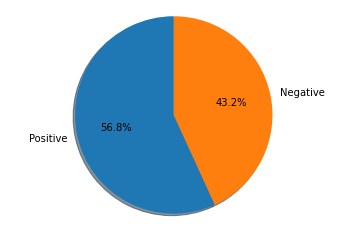

In [68]:
data = tweets_final['sentiment'].value_counts()
labels = 'Positive','Negative'

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [78]:
tweets_final['language'].unique()

tweets_final.set_index(['language','sentiment']).count(level='language')

,_id,tweet_id,user_name,user_location,hashtags,original_tweet,content
language,,,,,,,
ca,4,4,4,4,4,1,4
cs,2,2,2,2,2,0,2
cy,1,1,1,1,1,1,1
da,1,1,1,1,1,0,1
de,36,36,36,36,36,11,36
el,1,1,1,1,1,0,1
en,8846,8846,8846,8846,8846,1584,8846
es,174,174,174,174,174,32,174
fa,3,3,3,3,3,0,3
